In [5]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [17]:
# 2. Load dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.concatenate([x_train, x_test])
y_train = np.concatenate([y_train, y_test])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[1], 1)
y_train = np_utils.to_categorical(y_train, 10)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25)

print(x_train.shape, x_val.shape, x_test.shape)

(42000, 28, 28, 1) (14000, 28, 28, 1) (14000, 28, 28, 1)


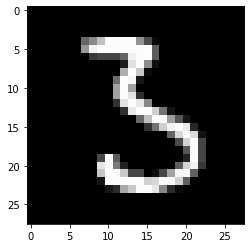

In [42]:
# Show picture:
def showPicture(linkOrImage):
  if type(linkOrImage) == 'str':
    img = plt.imread(linkOrImage)
    plt.imshow(img) 
  else:
    plt.imshow(linkOrImage.reshape(28, 28), cmap='gray')

showPicture(x_train[1])

In [ ]:
# 3. Định nghĩa model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1313/1313 [==============================] - 53s 40ms/step - loss: 0.3271 - accuracy: 0.9238 - val_loss: 0.1155 - val_accuracy: 0.9676
Epoch 2/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0836 - accuracy: 0.9772 - val_loss: 0.0829 - val_accuracy: 0.9751
Epoch 3/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0703 - accuracy: 0.9798 - val_loss: 0.0825 - val_accuracy: 0.9749
Epoch 4/10
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0696 - val_accuracy: 0.9802
Epoch 5/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0529 - accuracy: 0.9839 - val_loss: 0.0729 - val_accuracy: 0.9764
Epoch 6/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0620 - accuracy: 0.9812 - val_loss: 0.0846 - val_accuracy: 0.9730
Epoch 7/10
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.0714 -

Accuracy:  [0.06469126790761948, 0.9804285764694214]
Precision: 0.980342
Recall: 0.980403
F1 score: 0.980344
[[1363    0    5    2    1    1    3    2    5    1]
 [   0 1548   10    4    2    0    0    5    2    1]
 [   0    1 1322    5    2    0    0   10    2    0]
 [   0    0    6 1414    0    6    0    1    0    2]
 [   0    2    4    0 1316    1    1    0    3   12]
 [   2    0    0   16    0 1268    5    0    3    4]
 [   3    0    1    1    3    8 1344    0    3    0]
 [   1    4    6    4    2    1    0 1454    2   17]
 [   2    3   11    4    4    5    2    3 1337    8]
 [   2    1    2    9   13    7    0    6    4 1360]]


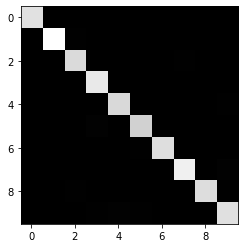

In [30]:
# 4. Đánh giá model với dữ liệu test set
from sklearn.metrics import *

accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: ', accuracy)
yhat_classes = model.predict(x_test, verbose=0)
yhat_classes = np.argmax(yhat_classes, axis = 1)
y_test_ = np.argmax(y_test, axis=1)
# predict crisp classes for test set
precision = precision_score(y_test_, yhat_classes, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_, yhat_classes, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_, yhat_classes, average='macro')
print('F1 score: %f' % f1)
plt.imshow(confusion_matrix(y_test_, yhat_classes), 'gray')
print(confusion_matrix(y_test_, yhat_classes))

Giá trị dự đoán:  3


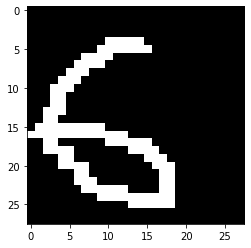

In [81]:
xTest = plt.imread('/content/drive/MyDrive/DeepLearning/6.png')
xTest = np.dot(xTest, [0.2989, 0.5870, 0.1140])
plt.imshow(xTest, cmap='gray')
y_predict2 = model.predict(xTest.reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict2))